In [10]:
import sklearn
sklearn.__version__

'1.2.2'

In [11]:
import pandas as pd

data = pd.read_csv('car_price_prediction.csv',header='infer')
data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [12]:
data.shape

(19237, 18)

In [13]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [14]:
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [15]:
# Check for duplicate rows in the DataFrame
duplicate_rows = data[data.duplicated()]

# Display the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
             ID  Price  Levy   Manufacturer        Model  Prod. year  \
425    45815372   7840     -  MERCEDES-BENZ        E 200        1998   
1581   45815363   8781     -         TOYOTA          Ist        2002   
1697   45732125  18503     -         TOYOTA        Prius        2010   
1972   45507765  20385     -  MERCEDES-BENZ      CLS 500        2005   
2131   45815363   8781     -         TOYOTA          Ist        2002   
...         ...    ...   ...            ...          ...         ...   
18974  45815465   2352  1273          LEXUS       IS 350        2015   
19137  45810466  15125   642      CHEVROLET      Orlando        2012   
19200  45725908  36065   640  MERCEDES-BENZ  CLA 250 AMG        2013   
19203  45761487  13485   645         TOYOTA        Prius        2011   
19210  45732939   8311   642        HYUNDAI       Sonata        2012   

        Category Leather interior Fuel type Engine volume    Mileage  \
425        Sedan               No       CNG    

In [16]:
# Remove duplicate rows
data_no_duplicates = data.drop_duplicates()

In [17]:
data=data_no_duplicates
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17

In [18]:
# drop ID column
data = data.drop(columns=['ID'])

In [19]:
data

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [20]:
data['Levy'].value_counts()

Levy
-       5709
765      482
891      453
639      403
640      398
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: count, Length: 559, dtype: int64

In [21]:
import numpy as np
# Replace '-' with NaN in the 'Levy' column
data['Levy'] = data['Levy'].replace('-', np.nan)

In [22]:
data['Levy'] = data['Levy'].astype(float)

In [23]:
from sklearn.impute import KNNImputer

# Replace the missing values in Levy with knn imputer
impute = KNNImputer(n_neighbors=5)
data['Levy'] = impute.fit_transform(data['Levy'].values.reshape(-1,1))
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  float64
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  object 
 9   Mileage           18924 non-null  object 
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Doors             18924 non-null  object 
 14  Wheel             18924 non-null  object 
 15  Color             18924 non-null  object 
 16  Airbags           18924 non-null  int64  
dty

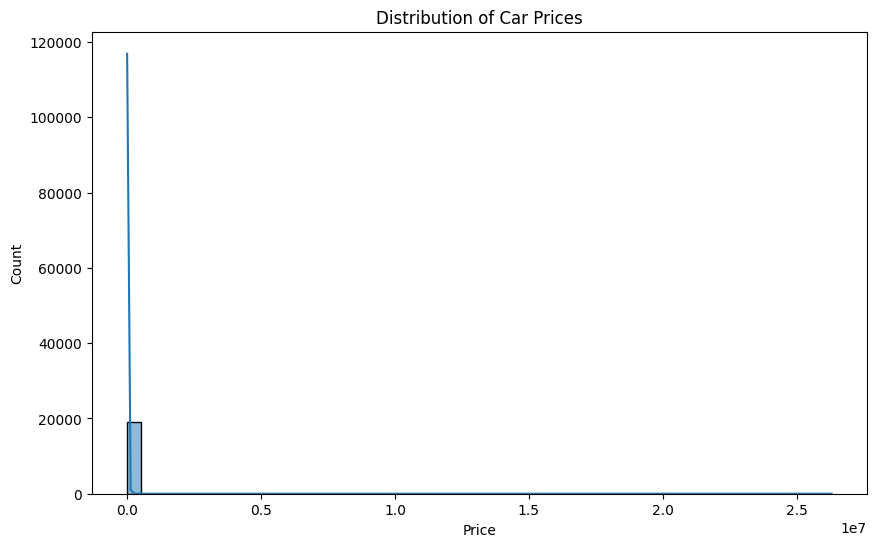

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Price
plt.figure(figsize=(10,6))
sns.histplot(data['Price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.show()


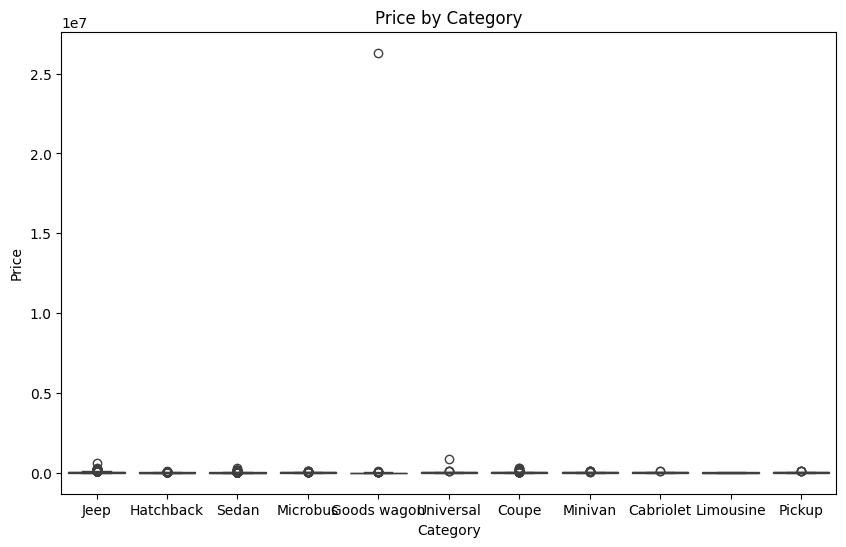

In [25]:
# Boxplot of Price by Category
plt.figure(figsize=(10,6))
sns.boxplot(x='Category', y='Price', data=data)
plt.title('Price by Category')
plt.show()

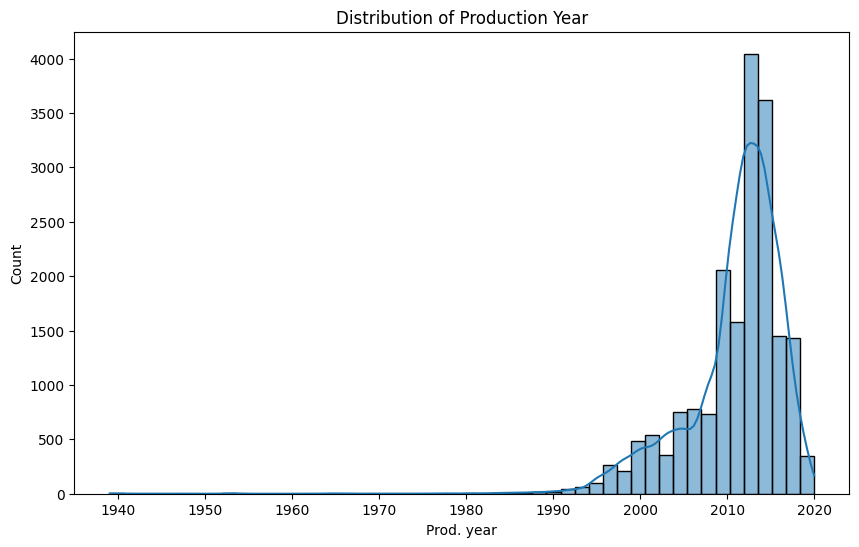

In [26]:

# Histogram of Production Year
plt.figure(figsize=(10,6))
sns.histplot(data['Prod. year'], bins=50, kde=True)
plt.title('Distribution of Production Year')
plt.show()


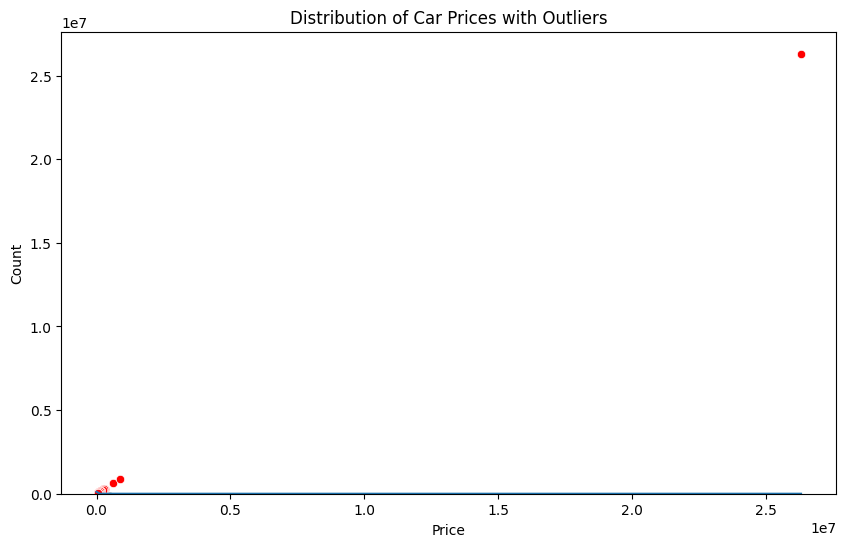

In [27]:

# Find outliers in the 'Price' column using IQR method
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[~((data['Price'] >= lower_bound) & (data['Price'] <= upper_bound))]

# Plot the histogram of price with outliers highlighted
plt.figure(figsize=(10,6))
sns.histplot(data['Price'], bins=50, kde=True)
sns.scatterplot(x=outliers['Price'], y=outliers['Price'], color='red')
plt.title('Distribution of Car Prices with Outliers')
plt.show()


In [28]:
print("Number of outliers:", len(outliers))


Number of outliers: 1055


In [29]:
# Removing the outliers from the Target
data_without_outliers = data[~((data['Price'] < lower_bound) | (data['Price'] > upper_bound))]
data_without_outliers.shape


(17869, 17)

In [30]:
data=data_without_outliers
data

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399.000000,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018.000000,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,906.299205,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862.000000,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446.000000,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,906.299205,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,15681,831.000000,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,26108,836.000000,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,5331,1288.000000,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


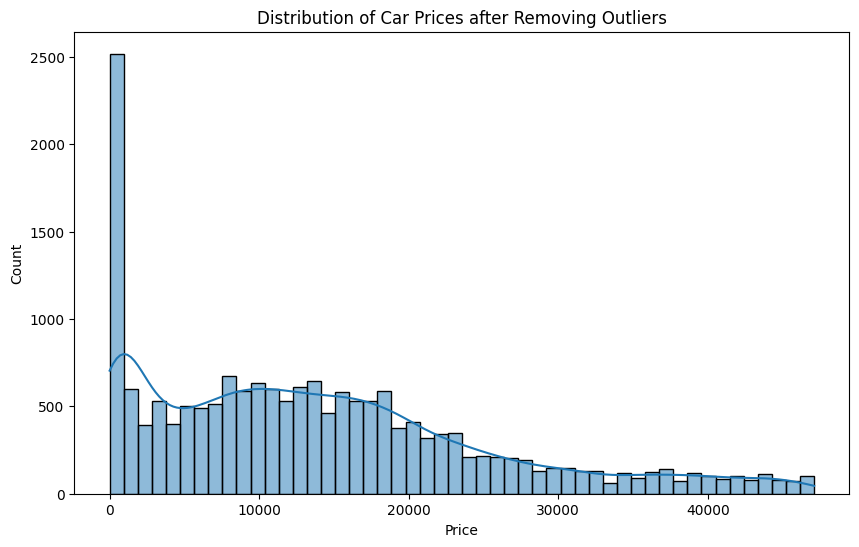

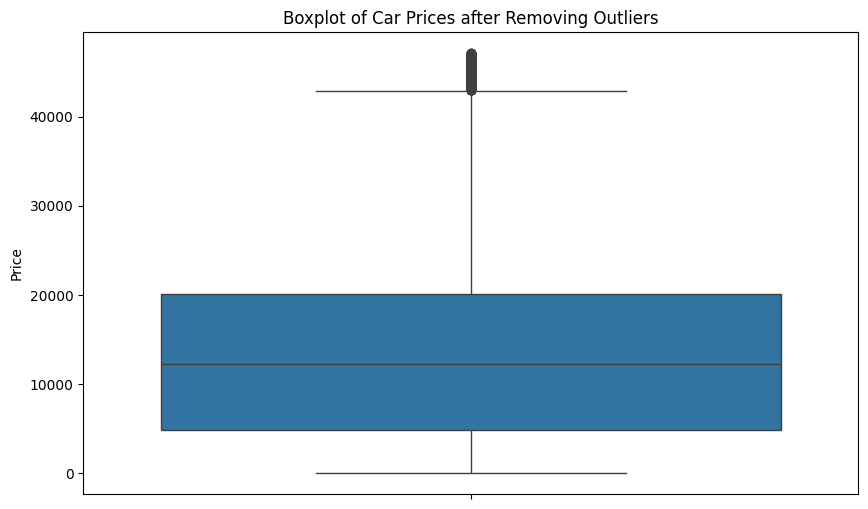

In [31]:
# Histogram of Price after removing outliers
plt.figure(figsize=(10,6))
sns.histplot(data['Price'], bins=50, kde=True)
plt.title('Distribution of Car Prices after Removing Outliers')
plt.show()

# Boxplot of Price after removing outliers
plt.figure(figsize=(10,6))
sns.boxplot(data['Price'])
plt.title('Boxplot of Car Prices after Removing Outliers')
plt.show()


In [32]:
data['Manufacturer'].value_counts()

Manufacturer
TOYOTA           3502
HYUNDAI          3425
MERCEDES-BENZ    1874
FORD             1035
CHEVROLET        1021
                 ... 
PONTIAC             1
LANCIA              1
FERRARI             1
HAVAL               1
GREATWALL           1
Name: count, Length: 61, dtype: int64

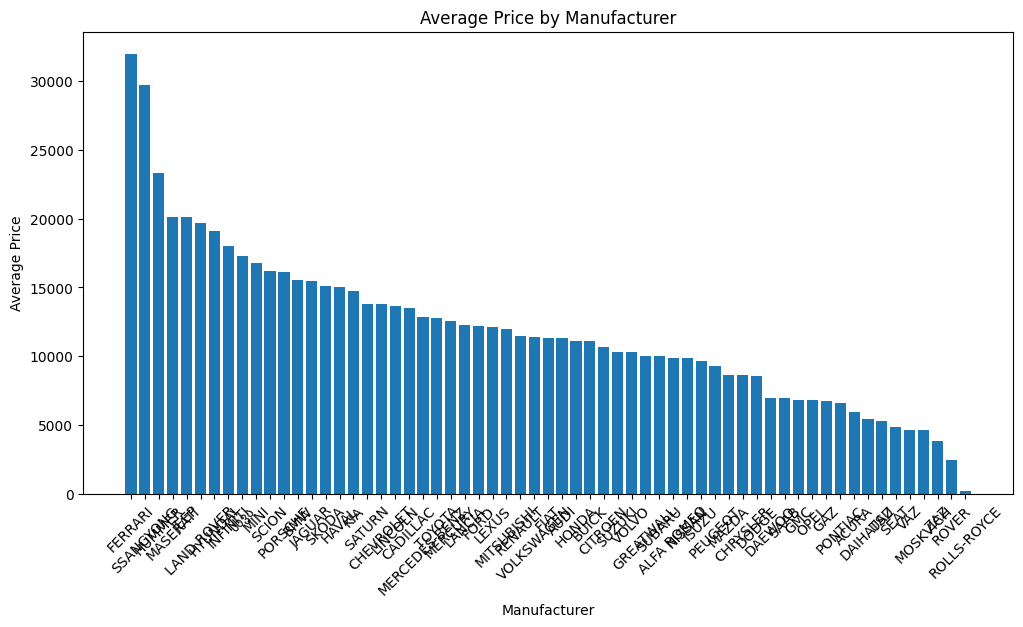

In [33]:
import matplotlib.pyplot as plt

# Group the data by manufacturer and calculate the average price
average_price_by_manufacturer = data.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False)

# Get the manufacturers and average prices as separate lists
manufacturers = average_price_by_manufacturer.index.to_list()
average_prices = average_price_by_manufacturer.values.tolist()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(manufacturers, average_prices)

# Add labels and title
plt.xlabel('Manufacturer')
plt.ylabel('Average Price')
plt.title('Average Price by Manufacturer')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [34]:
data['Model'].value_counts()


Model
Prius                     1068
Sonata                    1007
Elantra                    907
Camry                      905
E 350                      526
                          ... 
Golf 2                       1
GLK 300                      1
Musa                         1
1500,1600 Schtufenheck       1
Prius C aqua                 1
Name: count, Length: 1498, dtype: int64

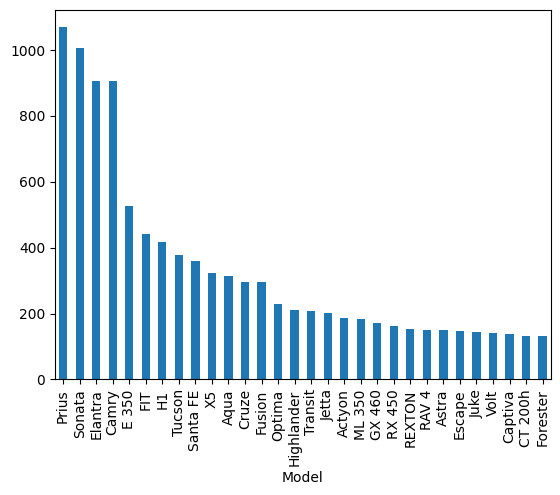

In [35]:
# top 30 model and their count

data['Model'].value_counts().head(30).plot(kind='bar')
plt.show()

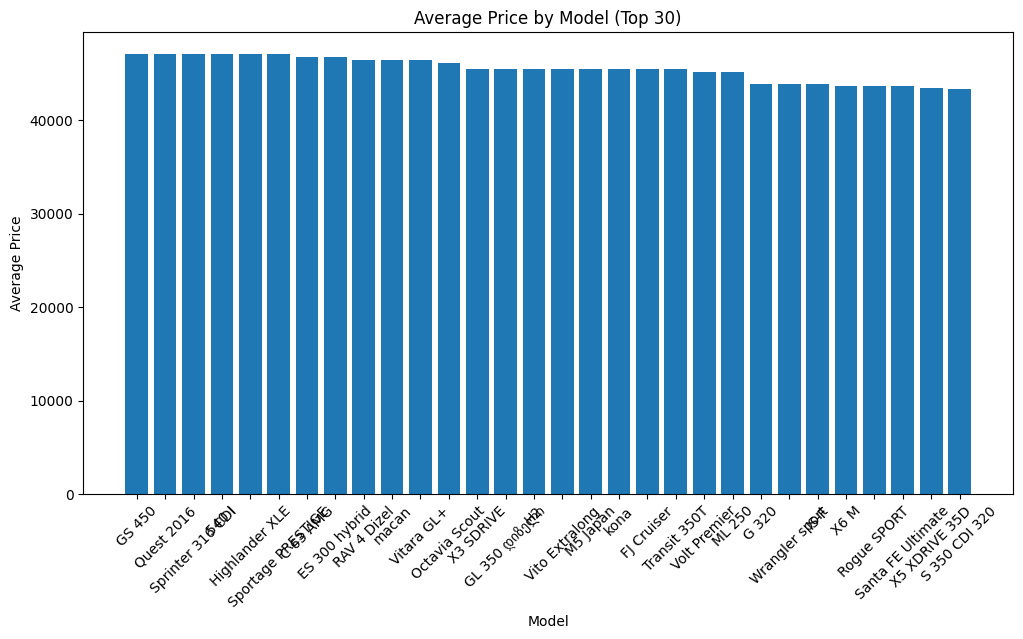

In [36]:
# Calculate average price for the top 30 models
average_price_by_model = data.groupby('Model')['Price'].mean().sort_values(ascending=False).head(30)

# Get the models and average prices as separate lists
models = average_price_by_model.index.to_list()
average_prices = average_price_by_model.values.tolist()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(models, average_prices)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Average Price')
plt.title('Average Price by Model (Top 30)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [37]:
data['Category'].value_counts()

Category
Sedan          8318
Jeep           4736
Hatchback      2781
Minivan         620
Coupe           477
Universal       339
Microbus        290
Goods wagon     227
Pickup           41
Cabriolet        29
Limousine        11
Name: count, dtype: int64

In [38]:
data['Leather interior'].value_counts()

Leather interior
Yes    12737
No      5132
Name: count, dtype: int64

In [39]:
data['Fuel type'].value_counts()

Fuel type
Petrol            9309
Diesel            3634
Hybrid            3495
LPG                878
CNG                469
Plug-in Hybrid      83
Hydrogen             1
Name: count, dtype: int64

In [40]:
data['Engine volume'].value_counts()

Engine volume
2            3573
2.5          2167
1.8          1742
1.6          1428
1.5          1248
             ... 
4.2 Turbo       1
6.7             1
3.1             1
0.8 Turbo       1
1.1 Turbo       1
Name: count, Length: 103, dtype: int64

In [41]:
data

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399.000000,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018.000000,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,906.299205,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862.000000,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446.000000,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,906.299205,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,15681,831.000000,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,26108,836.000000,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,5331,1288.000000,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [42]:
# prompt: Creating a new column to isolate turbo engines and removing the string from the original column

# # Create a new column to isolate turbo engines
data['Turbo'] = data['Engine volume'].apply(lambda x: 1 if 'Turbo' in x else 0)

# # Remove the string "Turbo" from the original column
data['Engine volume'] = data['Engine volume'].apply(lambda x: x.replace('Turbo', '').strip())


<ipython-input-42-1b3ab132c3b7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Turbo'] = data['Engine volume'].apply(lambda x: 1 if 'Turbo' in x else 0)
<ipython-input-42-1b3ab132c3b7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Engine volume'] = data['Engine volume'].apply(lambda x: x.replace('Turbo', '').strip())


In [43]:
data['Engine volume'].value_counts()

Engine volume
2      3573
2.5    2250
1.8    1917
1.6    1541
1.5    1313
       ... 
6.7       1
0.5       1
3.1       1
5.2       1
5.8       1
Name: count, Length: 68, dtype: int64

In [44]:
data

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399.000000,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,0
1,16621,1018.000000,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,0
2,8467,906.299205,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,0
3,3607,862.000000,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,0
4,11726,446.000000,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,906.299205,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,1
19233,15681,831.000000,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,0
19234,26108,836.000000,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,0
19235,5331,1288.000000,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4,0


In [45]:

data['Mileage'] = data['Mileage'].str.replace('km', '').astype(float)


<ipython-input-45-66d1fca53b23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Mileage'] = data['Mileage'].str.replace('km', '').astype(float)


In [46]:
data

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399.000000,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,0
1,16621,1018.000000,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,0
2,8467,906.299205,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2,0
3,3607,862.000000,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0,0
4,11726,446.000000,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,906.299205,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,1
19233,15681,831.000000,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,0
19234,26108,836.000000,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365.0,4.0,Automatic,Front,04-May,Left wheel,Grey,4,0
19235,5331,1288.000000,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258.0,4.0,Automatic,Front,04-May,Left wheel,Black,4,0


In [47]:
data['Cylinders'].value_counts()

Cylinders
4.0     13524
6.0      3140
8.0       804
5.0       167
3.0       107
2.0        42
1.0        35
12.0       29
10.0       10
16.0        5
7.0         4
9.0         1
14.0        1
Name: count, dtype: int64

In [48]:
data['Gear box type'].value_counts()

Gear box type
Automatic    12593
Tiptronic     2736
Manual        1816
Variator       724
Name: count, dtype: int64

In [49]:
data['Drive wheels'].value_counts()

Drive wheels
Front    12155
4x4       3589
Rear      2125
Name: count, dtype: int64

In [50]:
data['Doors'].value_counts()


Doors
04-May    17028
02-Mar      729
>5          112
Name: count, dtype: int64

In [51]:
# Group the data by number of doors and calculate the average price
average_price_by_doors = data.groupby('Doors')['Price'].mean()

# Print the average price for each number of doors
print(average_price_by_doors)

# Check if there is a significant difference in price based on number of doors
import scipy.stats as stats

# Perform an ANOVA test to compare the means of multiple groups
f_value, p_value = stats.f_oneway(data[data['Doors'] == 2]['Price'], data[data['Doors'] == 3]['Price'], data[data['Doors'] == 4]['Price'], data[data['Doors'] == 5]['Price'])

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference in price based on number of doors.")
else:
    print("There is no statistically significant difference in price based on number of doors.")




Doors
02-Mar    12770.255144
04-May    14082.586798
>5        15844.607143
Name: Price, dtype: float64
There is no statistically significant difference in price based on number of doors.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [52]:
data = data.drop('Doors', axis=1)
print(data)

       Price         Levy   Manufacturer    Model  Prod. year   Category  \
0      13328  1399.000000          LEXUS   RX 450        2010       Jeep   
1      16621  1018.000000      CHEVROLET  Equinox        2011       Jeep   
2       8467   906.299205          HONDA      FIT        2006  Hatchback   
3       3607   862.000000           FORD   Escape        2011       Jeep   
4      11726   446.000000          HONDA      FIT        2014  Hatchback   
...      ...          ...            ...      ...         ...        ...   
19232   8467   906.299205  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  15681   831.000000        HYUNDAI   Sonata        2011      Sedan   
19234  26108   836.000000        HYUNDAI   Tucson        2010       Jeep   
19235   5331  1288.000000      CHEVROLET  Captiva        2007       Jeep   
19236    470   753.000000        HYUNDAI   Sonata        2012      Sedan   

      Leather interior Fuel type Engine volume   Mileage  Cylinders  \
0               

In [53]:
data['Wheel'].value_counts()

Wheel
Left wheel          16420
Right-hand drive     1449
Name: count, dtype: int64

In [54]:
data['Color'].value_counts()

Color
Black            4554
White            4143
Silver           3628
Grey             2167
Blue             1314
Red               606
Green             319
Orange            248
Carnelian red     173
Brown             168
Golden            139
Beige             130
Sky blue          121
Yellow             96
Purple             39
Pink               24
Name: count, dtype: int64

In [55]:
data['Airbags'].value_counts()

Airbags
4     5245
12    5241
0     2268
8     1530
6     1258
2     1044
10     788
5      102
7       83
16      79
1       76
9       60
3       37
11      32
14      18
15       6
13       2
Name: count, dtype: int64

<ipython-input-56-2eb84076d8bb>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='Price', data=data, order=sorted_data, ax=axes[i], ci=None)
<ipython-input-56-2eb84076d8bb>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='Price', data=data, order=sorted_data, ax=axes[i], ci=None)
<ipython-input-56-2eb84076d8bb>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='Price', data=data, order=sorted_data, ax=axes[i], ci=None)
<ipython-input-56-2eb84076d8bb>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='Price', data=data, order=sorted_data, ax=axes[i], ci=None)
<ipython-input-56-2eb84076d8bb>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barpl

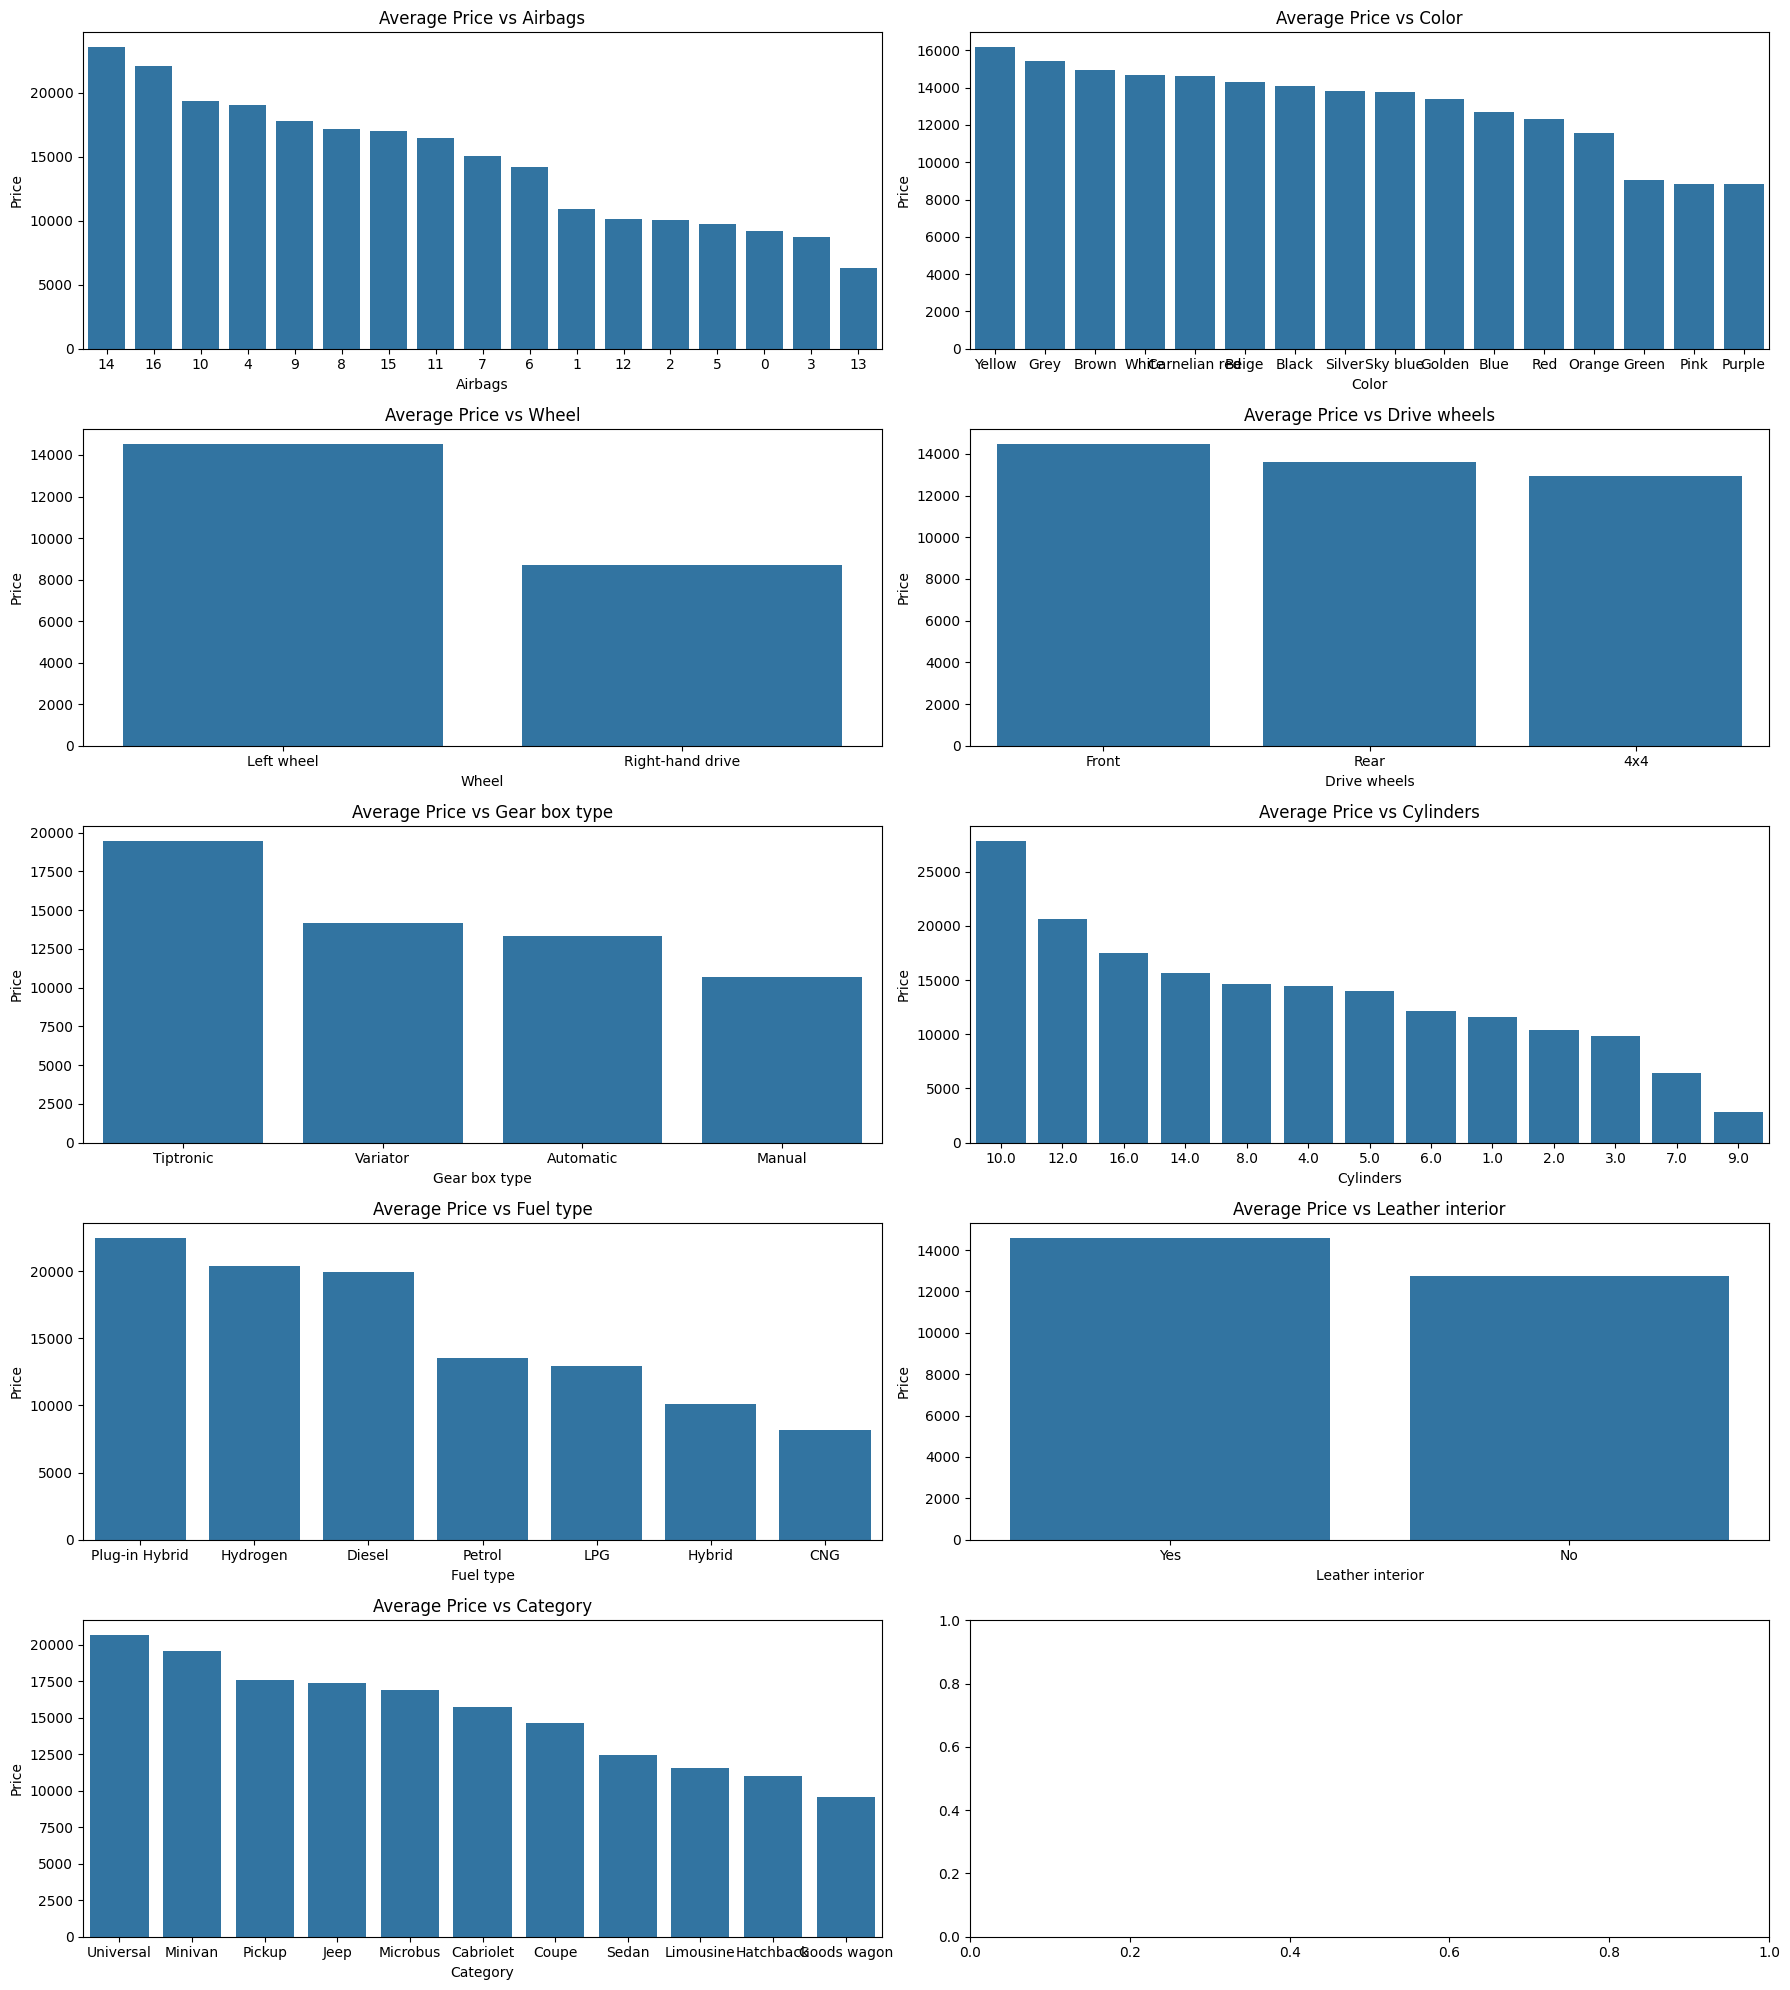

In [56]:
# List of columns to plot
columns_to_plot = ['Airbags', 'Color', 'Wheel', 'Drive wheels', 'Gear box type', 'Cylinders', 'Fuel type', 'Leather interior', 'Category']

# Create a 5x2 subplot grid
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 20))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate over the columns and create bar plots
for i, column in enumerate(columns_to_plot):
    # Sort the data by the average price in descending order
    sorted_data = data.groupby(column)['Price'].mean().sort_values(ascending=False).index

    sns.barplot(x=column, y='Price', data=data, order=sorted_data, ax=axes[i], ci=None)
    axes[i].set_title(f'Average Price vs {column}')

# Adjust layout
plt.tight_layout()
plt.show()

In [57]:
data

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo
0,13328,1399.000000,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,Left wheel,Silver,12,0
1,16621,1018.000000,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,Left wheel,Black,8,0
2,8467,906.299205,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,Right-hand drive,Black,2,0
3,3607,862.000000,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,Left wheel,White,0,0
4,11726,446.000000,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,Left wheel,Silver,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,906.299205,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,Left wheel,Silver,5,1
19233,15681,831.000000,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,Left wheel,Red,8,0
19234,26108,836.000000,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365.0,4.0,Automatic,Front,Left wheel,Grey,4,0
19235,5331,1288.000000,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258.0,4.0,Automatic,Front,Left wheel,Black,4,0


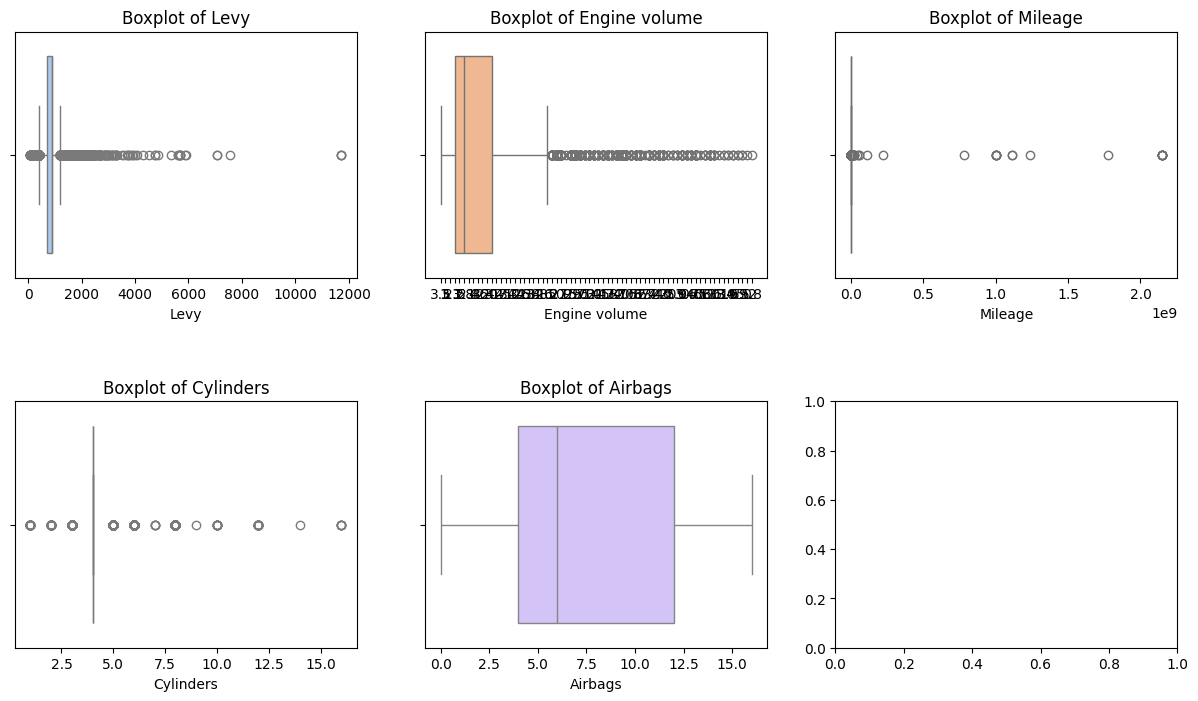

In [58]:
columns_for_boxplots = ['Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Define a colorful palette for the boxplots
color_palette = sns.color_palette("pastel")

# Create boxplots for each column
for i, column in enumerate(columns_for_boxplots):
    sns.boxplot(x=data[column], ax=axes[i], color=color_palette[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)

plt.show()

In [59]:

columns_to_check = ['Levy', 'Engine volume', 'Mileage','Cylinders']# Not including Airbags

for col in columns_to_check:
    data[col] = pd.to_numeric(data[col], errors='coerce')

for col in columns_to_check:
    # Calculate the interquartile range (IQR)
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    # Remove outliers from the DataFrame
    data = data[~((data[col] < lower_bound) | (data[col] > upper_bound))]

# Print the updated DataFrame
data


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo
2,8467,906.299205,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,Right-hand drive,Black,2,0
3,3607,862.000000,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,Left wheel,White,0,0
4,11726,446.000000,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,Left wheel,Silver,4,0
5,39493,891.000000,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,160931.0,4.0,Automatic,Front,Left wheel,White,4,0
6,1803,761.000000,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909.0,4.0,Automatic,Front,Left wheel,White,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19230,470,645.000000,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325.0,4.0,Automatic,Front,Left wheel,Silver,12,0
19232,8467,906.299205,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,Left wheel,Silver,5,1
19233,15681,831.000000,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,Left wheel,Red,8,0
19234,26108,836.000000,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365.0,4.0,Automatic,Front,Left wheel,Grey,4,0


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11698 entries, 2 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             11698 non-null  int64  
 1   Levy              11698 non-null  float64
 2   Manufacturer      11698 non-null  object 
 3   Model             11698 non-null  object 
 4   Prod. year        11698 non-null  int64  
 5   Category          11698 non-null  object 
 6   Leather interior  11698 non-null  object 
 7   Fuel type         11698 non-null  object 
 8   Engine volume     11698 non-null  float64
 9   Mileage           11698 non-null  float64
 10  Cylinders         11698 non-null  float64
 11  Gear box type     11698 non-null  object 
 12  Drive wheels      11698 non-null  object 
 13  Wheel             11698 non-null  object 
 14  Color             11698 non-null  object 
 15  Airbags           11698 non-null  int64  
 16  Turbo             11698 non-null  int64  
dty

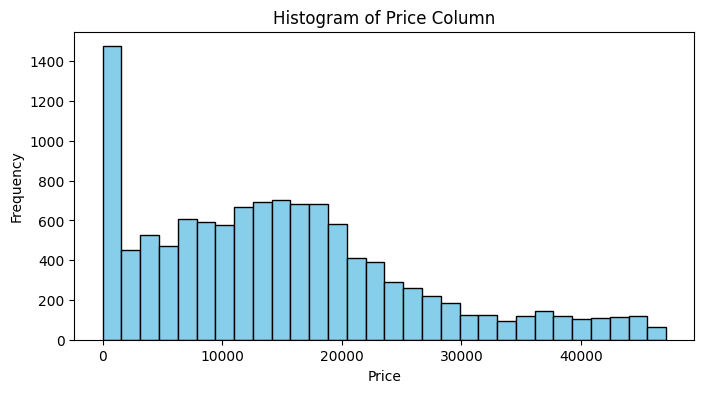

In [61]:
import matplotlib.pyplot as plt

# Looking at histogram of Price again, we see there are a lot of cars with very very low prices.
plt.figure(figsize=(8, 4))
plt.hist(data['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Price Column')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [62]:

rows_with_low_price = data[data['Price'] < 500]

# Display the DataFrame with horizontal scrolling
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
display(rows_with_low_price)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo
27,30,906.299205,TOYOTA,Prius,2008,Sedan,No,Hybrid,1.5,169000.0,4.0,Automatic,Front,Left wheel,White,8,0
53,392,1017.000000,MERCEDES-BENZ,E 300,2017,Sedan,Yes,Petrol,2.0,1600.0,4.0,Automatic,Rear,Left wheel,Black,12,0
68,314,779.000000,TOYOTA,Camry,2013,Sedan,Yes,Hybrid,2.5,225510.0,4.0,Automatic,Front,Left wheel,White,12,0
79,220,1185.000000,FORD,Escape,2009,Jeep,Yes,Hybrid,2.5,193614.0,4.0,Automatic,Front,Left wheel,White,0,0
117,94,906.299205,HONDA,FIT,2003,Hatchback,No,Petrol,1.5,178000.0,4.0,Variator,Front,Right-hand drive,Silver,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19215,470,831.000000,HYUNDAI,Elantra,2017,Sedan,Yes,Petrol,1.6,25635.0,4.0,Automatic,Front,Left wheel,Black,12,0
19218,30,906.299205,NISSAN,Note,2006,Hatchback,No,Petrol,1.3,0.0,4.0,Automatic,Front,Right-hand drive,Green,9,0
19229,50,906.299205,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000.0,4.0,Automatic,Front,Left wheel,Silver,6,0
19230,470,645.000000,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325.0,4.0,Automatic,Front,Left wheel,Silver,12,0


In [63]:
# We will remove these cars with prices below 500 because the prices are not realistic on these and it will create bias in the model if left in the data
# Filter to leave rows where price is greater than 500
data = data[data['Price'] >= 500]
data

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo
2,8467,906.299205,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,Right-hand drive,Black,2,0
3,3607,862.000000,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,Left wheel,White,0,0
4,11726,446.000000,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,Left wheel,Silver,4,0
5,39493,891.000000,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,160931.0,4.0,Automatic,Front,Left wheel,White,4,0
6,1803,761.000000,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909.0,4.0,Automatic,Front,Left wheel,White,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19224,19130,906.299205,KIA,Optima ex,2014,Sedan,Yes,Petrol,2.4,35800.0,4.0,Automatic,Front,Left wheel,Black,12,0
19225,8781,1107.000000,OPEL,Combo,2007,Goods wagon,No,Diesel,1.7,236000.0,4.0,Manual,Front,Left wheel,Beige,4,1
19232,8467,906.299205,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,Left wheel,Silver,5,1
19233,15681,831.000000,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,Left wheel,Red,8,0


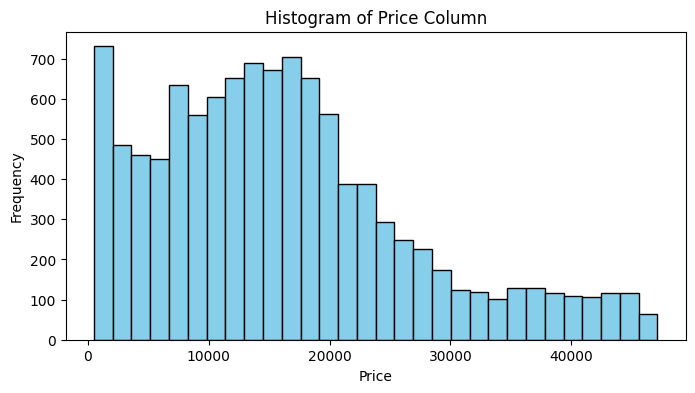

In [64]:
plt.figure(figsize=(8, 4))
plt.hist(data['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Price Column')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [65]:
# Create a function to convert string values to boolean columns
# def convert_to_bool_columns(df, column_name, values):
#   for value in values:
#     new_column_name = f"{column_name}_{value}"
#     df[new_column_name] = (df[column_name] == value).astype(bool)

# Apply the function to the DataFrame
# convert_to_bool_columns(data, 'Leather interior', ['Yes', 'No'])
# convert_to_bool_columns(data, 'Fuel type', ['Diesel', 'Hybrid', 'LPG', 'Petrol', 'Plug-in Hybrid'])
# convert_to_bool_columns(data, 'Gear box type', ['Tiptronic', 'Variator'])
# convert_to_bool_columns(data, 'Drive wheels', ['Front', 'Rear'])
# convert_to_bool_columns(data, 'Wheel', ['Right-hand drive'])
# convert_to_bool_columns(data, 'Color', ['Black', 'Blue', 'Brown', 'Carnelian red', 'Golden', 'Green', 'Grey', 'Orange', 'Red', 'Silver', 'Violet', 'White', 'Yellow'])

# Print the updated DataFrame
# data


In [66]:
# Drop the original columns
data.drop(columns=['Levy', 'Airbags', 'Turbo'], inplace=True)

<ipython-input-66-5afb9f14f809>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Levy', 'Airbags', 'Turbo'], inplace=True)


In [67]:
# data = data.replace({True: 1, False: 0})
# data


In [68]:
import pandas as pd
import json

# Your DataFrame 'data' goes here
# ...

# Dictionary to hold the mapping for each column
category_mappings = {}

# Convert all non-numeric columns to numeric and save the mapping
for col in data.select_dtypes(include='object').columns:
    # Save the original categories
    categories = pd.Categorical(data[col])
    # Create a mapping of category name to code
    mapping = dict(enumerate(categories.categories))
    # Store the mapping for the column
    category_mappings[col] = {v: k for k, v in mapping.items()}
    # Replace the column with its codes
    data[col] = categories.codes

# Print out the mappings
for col, mapping in category_mappings.items():
    print(f"Mapping for {col}: {mapping}")

# Convert the mappings to a JSON string
mappings_json = json.dumps(category_mappings, indent=4)

# Write the JSON string to a file
with open("category_mappings.json", "w") as json_file:
    json_file.write(mappings_json)

print("Mappings have been written to category_mappings.json")

data


Mapping for Manufacturer: {'ACURA': 0, 'ALFA ROMEO': 1, 'AUDI': 2, 'BMW': 3, 'BUICK': 4, 'CADILLAC': 5, 'CHEVROLET': 6, 'CHRYSLER': 7, 'CITROEN': 8, 'DAEWOO': 9, 'DAIHATSU': 10, 'DODGE': 11, 'FIAT': 12, 'FORD': 13, 'GAZ': 14, 'GMC': 15, 'HAVAL': 16, 'HONDA': 17, 'HYUNDAI': 18, 'INFINITI': 19, 'JAGUAR': 20, 'JEEP': 21, 'KIA': 22, 'LANCIA': 23, 'LAND ROVER': 24, 'LEXUS': 25, 'LINCOLN': 26, 'MAZDA': 27, 'MERCEDES-BENZ': 28, 'MERCURY': 29, 'MINI': 30, 'MITSUBISHI': 31, 'MOSKVICH': 32, 'NISSAN': 33, 'OPEL': 34, 'PEUGEOT': 35, 'PORSCHE': 36, 'RENAULT': 37, 'ROVER': 38, 'SAAB': 39, 'SATURN': 40, 'SCION': 41, 'SEAT': 42, 'SKODA': 43, 'SSANGYONG': 44, 'SUBARU': 45, 'SUZUKI': 46, 'TOYOTA': 47, 'UAZ': 48, 'VAZ': 49, 'VOLKSWAGEN': 50, 'VOLVO': 51, 'ZAZ': 52, 'სხვა': 53}
Mapping for Model: {'09-Mar': 0, '100 NX': 1, '1000': 2, '1111': 3, '114': 4, '118': 5, '118 2,0': 6, '118 M-sport LCI': 7, '120': 8, '1300': 9, '147': 10, '1500': 11, '159': 12, '190': 13, '20': 14, '200': 15, '206': 16, '206 CC':

<ipython-input-68-9832cc8680b8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = categories.codes
<ipython-input-68-9832cc8680b8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = categories.codes
<ipython-input-68-9832cc8680b8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color
2,8467,17,412,2006,3,0,4,1.3,200000.0,4.0,3,1,1,1
3,3607,13,397,2011,4,1,2,2.5,168966.0,4.0,0,0,0,14
4,11726,17,412,2014,3,1,4,1.3,91901.0,4.0,0,1,0,12
5,39493,18,762,2016,4,1,1,2.0,160931.0,4.0,0,1,0,14
6,1803,47,698,2010,3,1,2,1.8,258909.0,4.0,0,1,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19224,19130,22,648,2014,9,1,4,2.4,35800.0,4.0,0,1,0,1
19225,8781,34,286,2007,2,0,1,1.7,236000.0,4.0,1,1,0,0
19232,8467,28,216,1999,1,1,0,2.0,300000.0,4.0,1,2,0,12
19233,15681,18,782,2011,9,1,4,2.4,161600.0,4.0,2,1,0,11


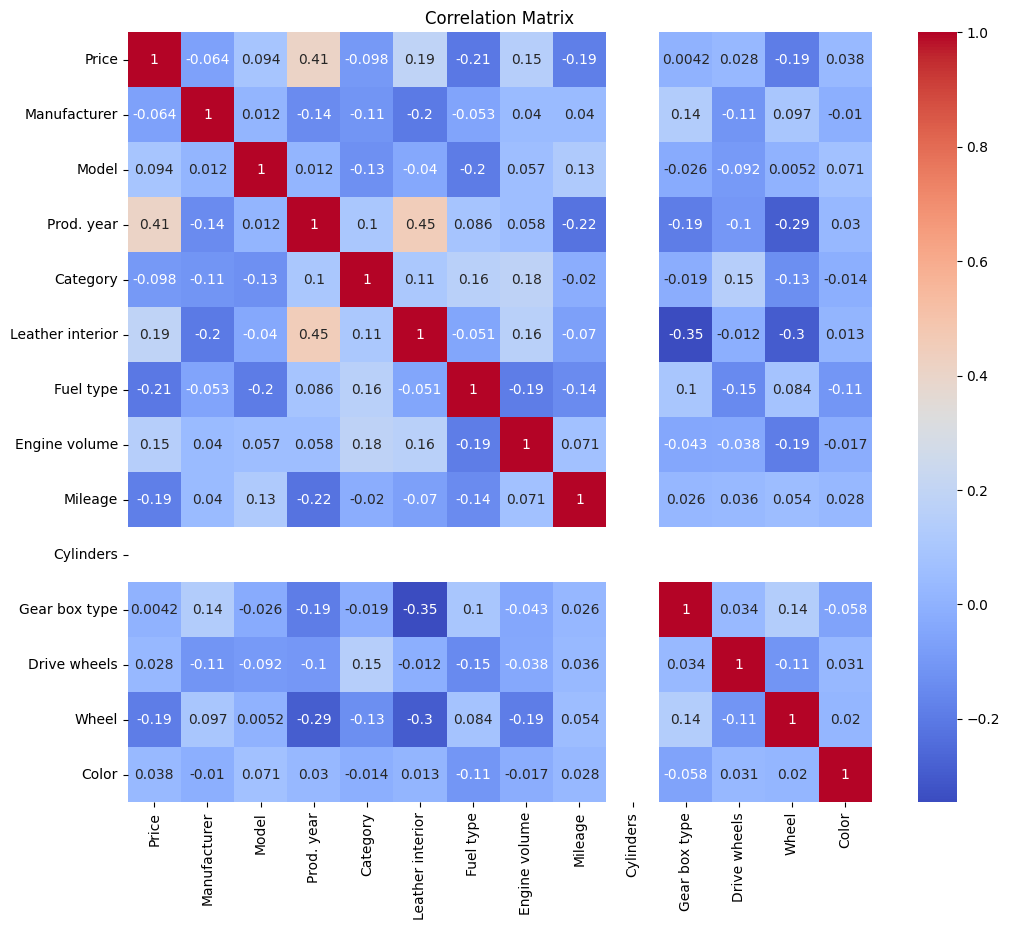

In [69]:
# Correlation Matrix
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

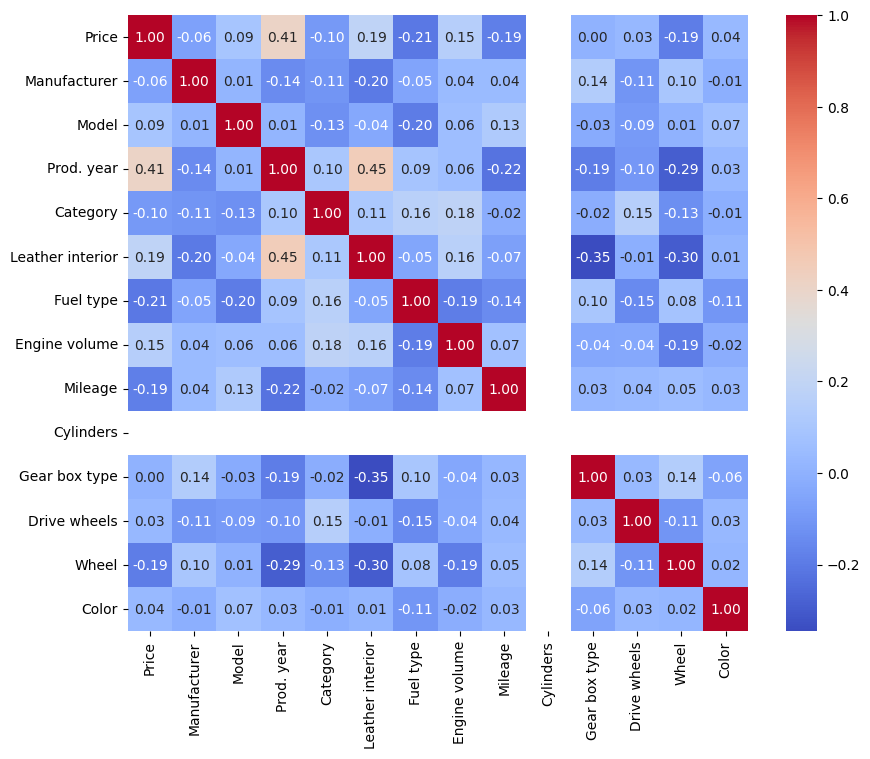

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import pickle

# Assuming 'data' is your DataFrame loaded earlier

features = data.drop('Price', axis=1)
target = data['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Define the models
models = {
    'Decision_Tree': DecisionTreeRegressor(random_state=42),
    'Random_Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear_Regression': LinearRegression()
}

# Train, evaluate each model and save only the Random Forest model and scaler
for model_name, model in models.items():
    # Train the model on the scaled training data
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Evaluation
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Displaying results
    print(f"{model_name} | MAE Train: {mae_train}, MAE Test: {mae_test}, R2 Train: {r2_train}, R2 Test: {r2_test}")

# Get feature names
feature_names = X_train.columns.tolist()

# Package the Random Forest model, scaler, and feature names into one dictionary
random_forest_package = {
    'scaler': scaler,
    'model': models['Random_Forest'],  # Only save the Random Forest model
    'feature_names': feature_names
}

# Serialize the Random Forest package to a .pkl file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(random_forest_package, file)

print("Random Forest model, scaler, and feature names have been saved to random_forest_model.pkl.")



Decision_Tree | MAE Train: 36.2194049454988, MAE Test: 4546.510050707506, R2 Train: 0.9984821135038265, R2 Test: 0.47931853460984575
Random_Forest | MAE Train: 1318.3313139573102, MAE Test: 3538.32665889333, R2 Train: 0.9635417473917511, R2 Test: 0.7304762930899095
Linear_Regression | MAE Train: 6898.395890358952, MAE Test: 6894.696808718007, R2 Train: 0.2980793814445236, R2 Test: 0.2685945950303046
Random Forest model, scaler, and feature names have been saved to random_forest_model.pkl.


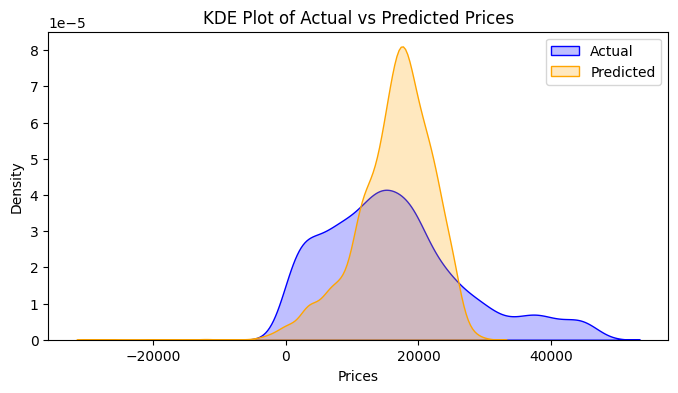

In [72]:
# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

# Plot the KDE plot for actual vs predicted values
plt.figure(figsize=(8, 4))
sns.kdeplot(data=plot_data, x='Actual', label='Actual', fill=True, common_norm=False, color='blue')
sns.kdeplot(data=plot_data, x='Predicted', label='Predicted', fill=True, common_norm=False, color='orange')
plt.title('KDE Plot of Actual vs Predicted Prices')
plt.xlabel('Prices')
plt.ylabel('Density')
plt.legend()
plt.show()

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import pickle

# Assuming 'data' is your DataFrame loaded earlier

features = data.drop('Price', axis=1)
target = data['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Capture the feature names for later use
feature_names = X_train.columns.tolist()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Initialize Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model on the scaled training data
random_forest_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = random_forest_model.predict(X_train_scaled)
y_test_pred = random_forest_model.predict(X_test_scaled)

# Evaluation
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Displaying results
print(f"Random Forest | MAE Train: {mae_train}, MAE Test: {mae_test}, R2 Train: {r2_train}, R2 Test: {r2_test}")

# Bundle the Random Forest model, scaler, and feature names into one dictionary
random_forest_package = {
    'scaler': scaler,
    'model': random_forest_model,
    'feature_names': feature_names
}

# Serialize the dictionary to a .pkl file
with open('random_forest_model(1).pkl', 'wb') as file:
    pickle.dump(random_forest_package, file)

print("Random Forest model, scaler, and feature names have been saved to random_forest_model.pkl.")


Random Forest | MAE Train: 1318.3313139573102, MAE Test: 3538.32665889333, R2 Train: 0.9635417473917511, R2 Test: 0.7304762930899095
Random Forest model, scaler, and feature names have been saved to random_forest_model.pkl.


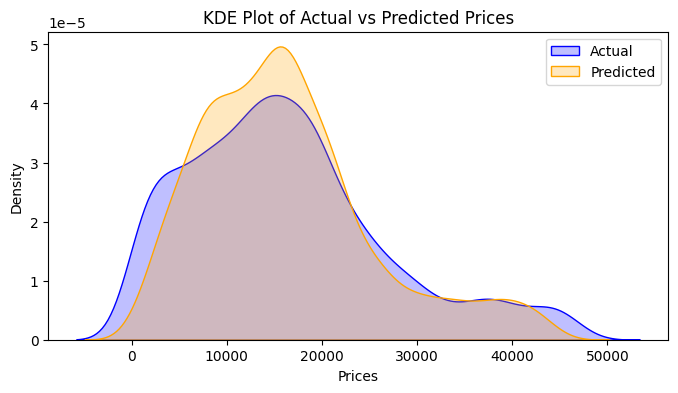

In [74]:
# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

# Plot the KDE plot for actual vs predicted values
plt.figure(figsize=(8, 4))
sns.kdeplot(data=plot_data, x='Actual', label='Actual', fill=True, common_norm=False, color='blue')
sns.kdeplot(data=plot_data, x='Predicted', label='Predicted', fill=True, common_norm=False, color='orange')
plt.title('KDE Plot of Actual vs Predicted Prices')
plt.xlabel('Prices')
plt.ylabel('Density')
plt.legend()
plt.show()